In [1]:
import os
import numpy as np
import pandas as pd
from google.colab import drive

# For Google Colab Mounting
drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/BOAZ")

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

train = pd.read_csv("train_V2.csv")

In [3]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


### 결측값 파악

In [32]:
print("Data Description:")
train.describe().T

Data Description:


,count,mean,std,min,25%,50%,75%,max
assists,4446966.0,0.233815,0.588573,0.0,0.0,0.0000,0.000000,22.0
boosts,4446966.0,1.106908,1.715794,0.0,0.0,0.0000,2.000000,33.0
damageDealt,4446966.0,130.717138,170.780621,0.0,0.0,84.2400,186.000000,6616.0
DBNOs,4446966.0,0.657876,1.145743,0.0,0.0,0.0000,1.000000,53.0
headshotKills,4446966.0,0.226820,0.602155,0.0,0.0,0.0000,0.000000,64.0
heals,4446966.0,1.370147,2.679982,0.0,0.0,0.0000,2.000000,80.0
killPlace,4446966.0,47.599350,27.462937,1.0,24.0,47.0000,71.000000,101.0
killPoints,4446966.0,505.006042,627.504896,0.0,0.0,0.0000,1172.000000,2170.0
kills,4446966.0,0.924783,1.558445,0.0,0.0,0.0000,1.000000,72.0
killStreaks,4446966.0,0.543955,0.710972,0.0,0.0,0.0000,1.000000,20.0


In [33]:
train.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [16]:
train[train['winPlacePerc'].isna()==True]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [4]:
df = train.dropna()

In [30]:
col = df.columns
col=list(col)

In [34]:
col.remove('winPlacePerc')
col.remove('Id')
col.remove('groupId')
col.remove('matchId')
col

['assists',
 'boosts',
 'damageDealt',
 'DBNOs',
 'headshotKills',
 'heals',
 'killPlace',
 'killPoints',
 'kills',
 'killStreaks',
 'longestKill',
 'matchDuration',
 'matchType',
 'maxPlace',
 'numGroups',
 'rankPoints',
 'revives',
 'rideDistance',
 'roadKills',
 'swimDistance',
 'teamKills',
 'vehicleDestroys',
 'walkDistance',
 'weaponsAcquired',
 'winPoints']

In [35]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [37]:
sns.pairplot(df)
plt.show()

KeyboardInterrupt: ignored

### 상관관계 파악

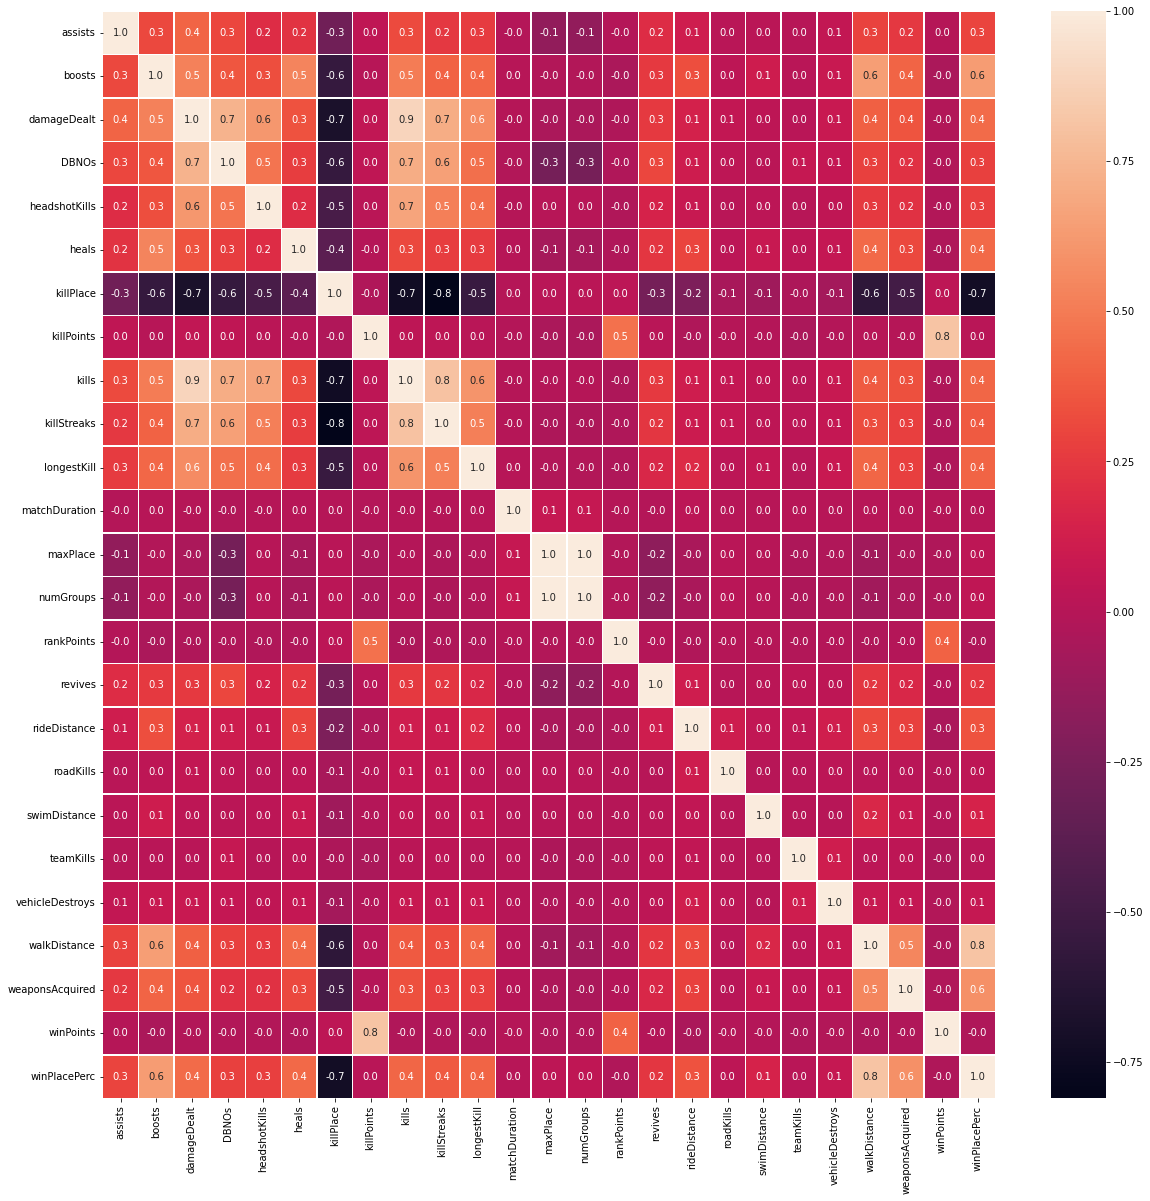

In [7]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)
plt.show()

killPlace 가 대체로 다른 변수와 음의 상관성이 높음
walkDistance, weaponsAcquired, kills, killStreaks,longestKill

In [49]:
corr_rank = df.corr()["winPlacePerc"].sort_values(ascending=False)
print(corr_rank)

winPlacePerc       1.000000
walkDistance       0.810886
boosts             0.634232
weaponsAcquired    0.583806
damageDealt        0.440506
heals              0.427856
kills              0.419915
longestKill        0.410153
killStreaks        0.377566
rideDistance       0.342914
assists            0.299439
DBNOs              0.279968
headshotKills      0.277722
revives            0.240880
swimDistance       0.149606
vehicleDestroys    0.073436
numGroups          0.039625
maxPlace           0.037381
roadKills          0.034544
teamKills          0.015942
killPoints         0.012909
matchDuration      0.002938
rankPoints        -0.024928
winPoints         -0.031472
killPlace         -0.719069
Name: winPlacePerc, dtype: float64


In [64]:
corr_rank = df.corr()["killPlace"].sort_values(ascending=False)
print(corr_rank)

killPlace          1.000000
numGroups          0.018786
maxPlace           0.016791
winPoints         -0.002415
matchDuration     -0.005806
rankPoints        -0.014805
killPoints        -0.023278
teamKills         -0.037797
roadKills         -0.057356
vehicleDestroys   -0.073569
swimDistance      -0.089396
rideDistance      -0.236202
revives           -0.269804
assists           -0.290062
heals             -0.386032
headshotKills     -0.469829
weaponsAcquired   -0.490144
longestKill       -0.541146
boosts            -0.554844
DBNOs             -0.555290
walkDistance      -0.590236
damageDealt       -0.677398
winPlacePerc      -0.719069
kills             -0.730499
killStreaks       -0.810517
Name: killPlace, dtype: float64


### 변수 가정
#### 1. Kill 관련 변수는 승률과 양의 관계
assists, damageDealt, headshotKills, killPlace, killPoints,killStreaks,kills, roadKills, teamKills, vehicleDestroys, weaponAcquired,
#### 2. 거리 관련 변수는 승률과 양의 관계
rideDistance, swimDistance, walkDistance,
#### 3. 팀킬이 자폭?이라면 승률과 음의 관계
#### 4. 아군 관련 변수 어떤 관계인지 확인해봐야 함
#### 5. 무기 수가 0인 경우 파악



In [60]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [22]:
## killPlace 확인 필요!!
kill = df[['assists', 'damageDealt', 'headshotKills', 'killPlace', 'killPoints','killStreaks','kills', 'roadKills', 'teamKills', 'vehicleDestroys', 'weaponsAcquired','winPlacePerc']]
corr_rank = kill.corr()["winPlacePerc"].sort_values(ascending=False)
print(corr_rank)

winPlacePerc       1.000000
weaponsAcquired    0.583806
damageDealt        0.440507
kills              0.419916
killStreaks        0.377566
assists            0.299441
headshotKills      0.277722
vehicleDestroys    0.073436
roadKills          0.034544
teamKills          0.015943
killPoints         0.012908
killPlace         -0.719069
Name: winPlacePerc, dtype: float64


In [24]:
distance = df[['rideDistance', 'swimDistance', 'walkDistance','winPlacePerc']]
corr_rank = distance.corr()["winPlacePerc"].sort_values(ascending=False)
print(corr_rank)

winPlacePerc    1.000000
walkDistance    0.810888
rideDistance    0.342915
swimDistance    0.149607
Name: winPlacePerc, dtype: float64


In [48]:
# sum functions
def simple_shot(var):
    print('mean value of {} : {}'.format(var, df[var].mean()))
    print('median value of {} : {}'.format(var, df[var].median()))
    print('top 1% of {} : {}'.format(var, df[var].quantile(0.99)))
    print('max of {} : {}'.format(var, df[var].max()))
    print('min of {} : {}'.format(var, df[var].min()))

#### 상관관계 높은 변수 자세히 파악

#### walkDistance
##### 이동거리가 긴 유저가 활발히 활동하면서 kill을 많이 했을 것이다?

In [49]:
simple_shot('walkDistance')

mean value of walkDistance : 1154.2181186480893
median value of walkDistance : 685.6
top 1% of walkDistance : 4396.0
max of walkDistance : 25780.0
min of walkDistance : 0.0


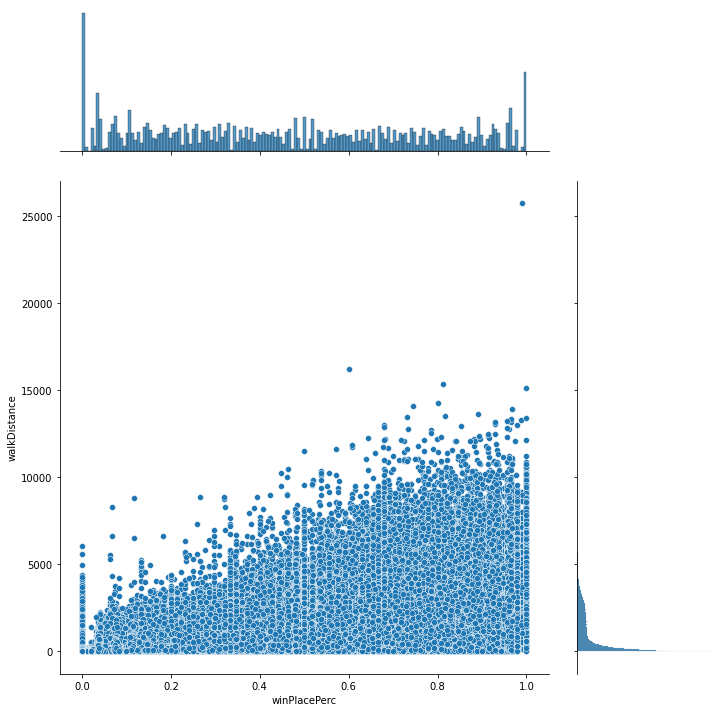

In [44]:
sns.jointplot(x="winPlacePerc", y="walkDistance",  data=df, height=10, ratio=3, palette='Blues')
plt.show()

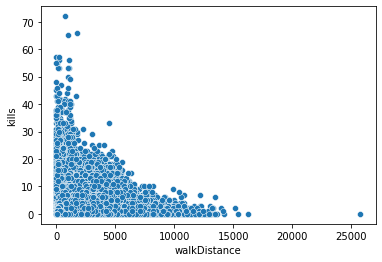

In [58]:
## 이동거리가 0인데 kill이 존재하는 값 처리 필요
sns.scatterplot(x='walkDistance', y='kills',data=df,sizes=(100,200))
plt.show()

### killPlace
#### 킬 횟수 순위라서 음의 관계?
0인 값이 많은 것 확인 필요

In [55]:
simple_shot('killPlace')

mean value of killPlace : 47.59936068757006
median value of killPlace : 47.0
top 1% of killPlace : 96.0
max of killPlace : 101
min of killPlace : 1


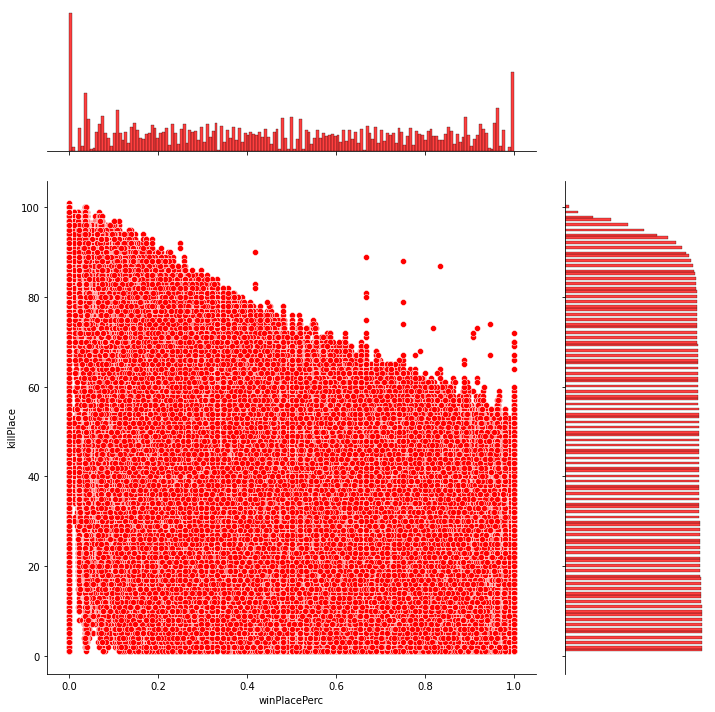

In [57]:
sns.jointplot(x="winPlacePerc", y="killPlace",  data=df, height=10, ratio=3, color='red')
plt.show()

### 이상치 확인

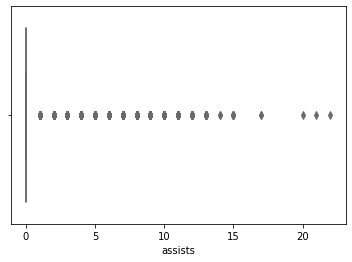

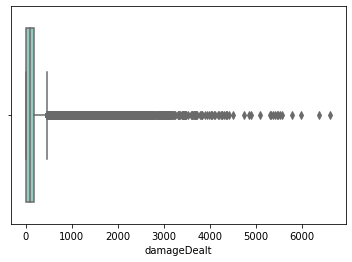

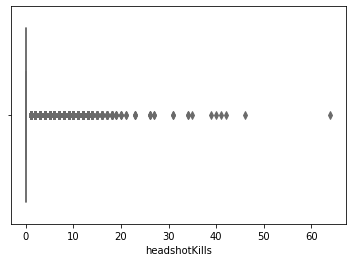

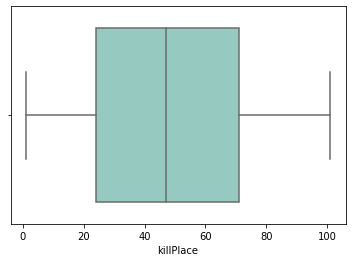

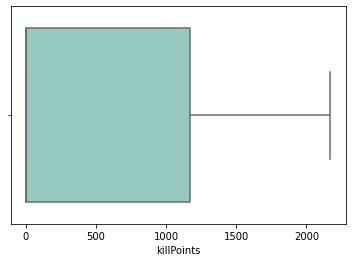

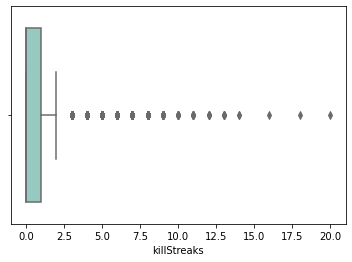

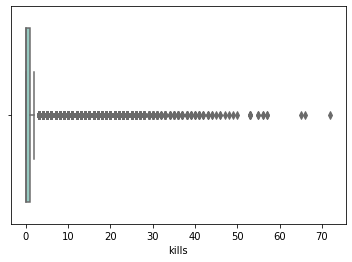

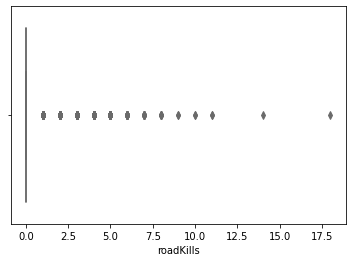

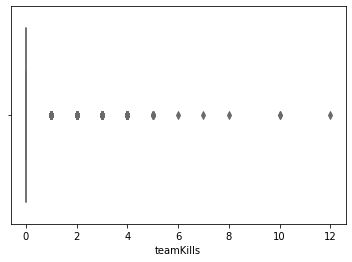

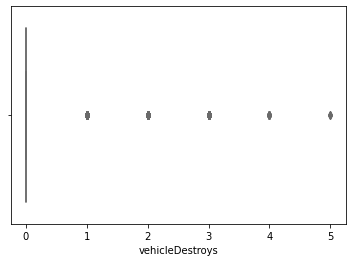

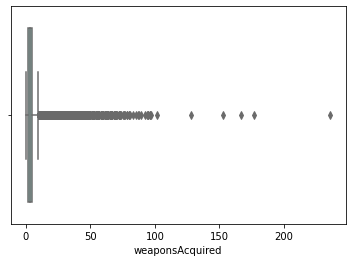

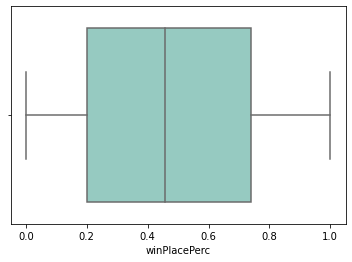

In [29]:
for i in kill:
  sns.boxplot(x = i,  data = df,palette = "Set3")
  plt.show()

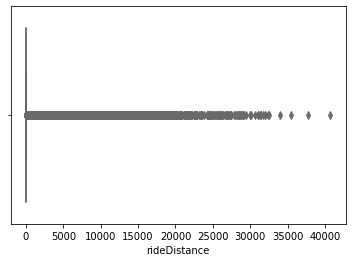

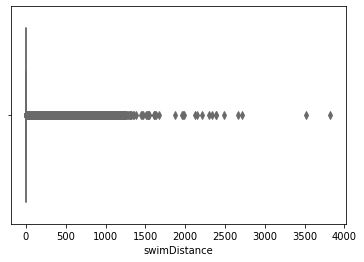

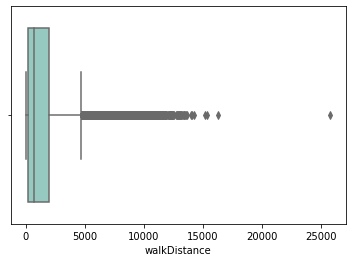

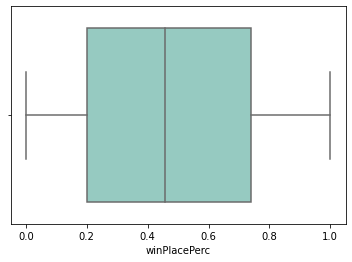

In [30]:
for i in distance:
  sns.boxplot(x = i,  data = df,palette = "Set3")
  plt.show()

walkDistance >25000 확인 후 제거 결정

In [31]:
df[df['walkDistance']>25000]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,items
497965,3304d0c68e27f5,503757159d22dd,ce88f9c8c35bdf,0,0,0.0,0,0,0,46,...,0.0078,0,381.9,0,0,25780.0,0,0,0.9894,0


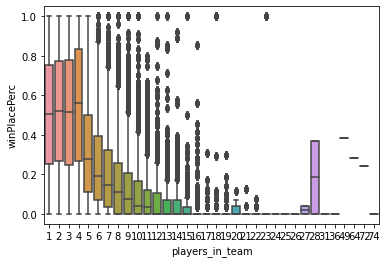

In [21]:
sns.boxplot(x = "players_in_team", y = "winPlacePerc", data = df_new)
plt.show()

### 가정 확인 후 제거할 값 결정

In [33]:
##
df[(df['weaponsAcquired']==0) & (df['teamKills']>0) & (df['rideDistance']==0)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,items
150,528c5d3fde5198,a69d29530369ee,75a3ed5107269f,0,0,0.0,1,0,0,84,...,0.0,0,0.00,1,0,22.6000,0,0,0.1071,0
1979,2fd411ab25fc89,25226091b29ec0,838cb29103410a,0,0,65.0,2,0,0,96,...,0.0,0,0.00,3,0,53.8200,0,1514,0.0000,0
3048,ac19a7c0009eda,49b1540c8b5887,24def70ac0479d,0,0,100.0,1,0,0,87,...,0.0,0,0.00,1,0,71.3100,0,1484,0.0000,0
3697,374167bbf452ce,0bd6782aee9324,f0650c7c76976d,0,0,0.0,0,0,0,85,...,0.0,0,0.00,1,0,0.0000,0,0,0.0345,0
6792,493383a6bc579d,8b172c1a5e558e,b3fb7febb91b9c,0,0,0.0,0,0,0,55,...,0.0,0,0.00,1,0,0.8415,0,0,0.6087,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4438745,a191133bb07926,da83162c56d961,a0153e462851c2,0,0,0.0,0,0,0,85,...,0.0,0,0.00,1,0,0.0000,0,0,0.0000,0
4438752,9e34c3c2531941,e2d3f5d87a37cf,e2c695d210bc74,0,0,0.0,1,0,0,81,...,0.0,0,0.00,1,0,3.6520,0,0,0.0800,0
4441910,194b993a17b6b0,ebec421decb94a,fea7c1fe9f5830,0,0,0.0,0,0,0,84,...,0.0,0,0.00,1,0,0.0000,0,0,0.0000,0
4444324,7b45862f0e6135,0802f88c8a9ad2,1c28bcc2761bef,0,0,0.0,0,0,0,91,...,0.0,0,61.71,1,0,0.2957,0,0,0.0417,0


In [35]:
# 달린 거리 0인데 roadKill
df[(df['roadKills']>0) & (df['rideDistance']==0)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,items
820,209314d1a20b48,72a26f1ded95d6,7abce2d2ca9e49,1,1,334.80,4,0,1,17,...,0.0,1,0.0,0,0,838.00,6,1533,0.3704,2
40362,81863d8837256d,af6e04e1b77f4b,59ad07f21f77dd,0,1,272.40,1,1,2,22,...,0.0,1,127.7,0,0,2443.00,4,0,0.5357,3
46376,ed7575c25f2a5e,9be59a8d7ae94b,6c5c240ed3e339,2,5,298.90,3,0,6,12,...,0.0,1,0.0,0,0,3054.00,4,1509,0.8980,11
50918,b5f8da95af493f,1a2f5a68a2720c,ae50bb56b6da4e,0,0,169.30,1,0,0,39,...,0.0,1,0.0,0,0,148.60,1,0,0.1333,0
55266,77178fffc09d09,86fd3da1738c43,620f0ea9a8c997,0,0,100.00,2,0,0,31,...,0.0,1,0.0,1,0,696.00,3,0,0.3704,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4417743,e32a8f224bee8a,a2f7c3e4f4ff2e,15fbf879405faf,0,3,328.90,1,1,2,4,...,0.0,1,104.6,0,0,2505.00,4,1499,0.8696,5
4418648,8dc09552147fe2,0284db08778c3b,f9a88397f45677,0,0,96.43,1,0,0,31,...,0.0,1,0.0,0,0,1293.00,3,1429,0.3462,0
4426830,c9df7b60fd1b00,b7460fb7ea1462,e31f8af291bb6e,0,0,100.00,1,0,0,36,...,0.0,1,0.0,0,0,29.41,1,0,0.0400,0
4444830,027b3f672516a1,766b70fa9c7750,4248befe3f7d28,0,6,442.90,4,0,6,4,...,0.0,1,0.0,0,0,2875.00,5,1503,0.8367,12


In [37]:
df[((df['heals']>0) | (df['boosts']>0)) & (df['walkDistance']==0)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,items
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.00,0,0,3,18,...,0.0,0,0.0,0,0,0.0,8,0,0.8571,3
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.60,0,0,6,33,...,0.0,0,0.0,0,0,0.0,22,0,0.6000,6
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.00,0,4,5,3,...,0.0,0,0.0,0,0,0.0,13,0,0.8947,5
15989,de0976ec4bf9b3,90f32129b74149,db413c7c48292c,1,0,63.52,0,0,1,60,...,0.0,0,0.0,0,0,0.0,6,1500,0.8571,1
18426,e6d6f94558dd2f,22818b9a9a6159,486200c5613f14,0,1,0.00,0,0,0,2,...,0.0,0,0.0,0,0,0.0,6,0,1.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4440898,a089cb33a75968,eda174acfb503b,4c6b1a0e4cb346,0,0,90.83,0,0,4,42,...,0.0,0,0.0,0,0,0.0,8,0,0.0000,4
4440927,0634c650048997,5ccccee03a7f17,fc0bbecba8db99,2,2,909.10,7,2,16,26,...,0.0,0,0.0,0,0,0.0,7,1500,0.6000,18
4441511,f5d385cadfab7e,a068f79011113c,fc0bbecba8db99,6,2,696.40,9,2,0,18,...,0.0,0,0.0,1,0,0.0,16,1500,0.9000,2
4441545,14bfbb338b0aff,e97f53d3e6cea3,5bbb53da00d787,0,0,198.00,0,0,1,3,...,0.0,0,0.0,0,0,0.0,2,0,0.0000,1


In [38]:
df[(df['weaponsAcquired']>0) & (df['walkDistance']==0)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,items
711,b9a35e03db6a7f,7b1b2b23d70cad,e1d2ac9fe9bbe1,0,0,0.00,0,0,0,95,...,0.0,0,0.0,0,0,0.0,1,0,0.0000,0
846,0df7c355497d77,325464bcf4c846,f3a64f99badeca,0,0,0.00,0,0,0,5,...,0.0,0,0.0,0,0,0.0,6,0,0.0000,0
1357,72f70c6c074ca9,da042db555b932,f3c5fa51aacb95,0,0,722.80,0,0,0,5,...,0.0,0,0.0,0,0,0.0,15,0,0.0000,0
1433,0a5036716cd6e0,65d3de7c9396c4,75cbdf89be0139,0,0,85.60,0,0,0,90,...,0.0,0,0.0,0,0,0.0,1,0,0.0000,0
1814,269108abb1ba4e,28d3205dd35436,61ec8e0f6bd01d,0,0,0.00,0,0,0,94,...,0.0,0,0.0,0,0,0.0,1,0,0.0106,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446464,672a8673146c3e,910ef021cfa4ee,7d66e01d3d9cd5,0,0,0.00,0,0,0,91,...,0.0,0,0.0,0,0,0.0,1,0,0.0532,0
4446682,b444f8c7af62b5,4e5b8eefdd669e,54277ef2ed69b7,0,0,41.95,0,0,0,48,...,0.0,0,0.0,0,0,0.0,4,0,0.9434,0
4446786,12c053c0567dca,9db52b9e2d4f8c,fe0c3ccbea8181,0,0,0.00,0,0,0,84,...,0.0,0,0.0,0,0,0.0,1,0,0.0000,0
4446812,484990766633ce,77770865680fe0,fb5acb99d6dc45,0,0,0.00,0,0,0,95,...,0.0,0,0.0,0,0,0.0,1,0,0.0000,0


In [40]:
solo 인데 assist
df[(df['matchType']==1) & (df['assists']>0)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,items


In [41]:
df[(df['assists']>0) & (df['walkDistance']==0)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,items
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.60,0,0,6,33,...,0.0,0,0.0,0,0,0.0,22,0,0.6000,6
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.00,0,4,5,3,...,0.0,0,0.0,0,0,0.0,13,0,0.8947,5
13696,b839546728f966,c703fed49cdf20,b3694f114c57ea,1,0,37.80,0,0,0,90,...,0.0,0,0.0,0,0,0.0,0,0,0.0326,0
15989,de0976ec4bf9b3,90f32129b74149,db413c7c48292c,1,0,63.52,0,0,1,60,...,0.0,0,0.0,0,0,0.0,6,1500,0.8571,1
23298,b950836d0427da,1f735b1e00d549,ad860f4e162bbc,1,0,1124.00,0,4,1,7,...,0.0,0,0.0,0,0,0.0,8,0,0.6000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4436511,a59d92769cbd15,c8cb8491112bf6,0104eeb664494d,1,0,221.60,4,2,1,33,...,0.0,0,0.0,0,0,0.0,8,1500,0.6000,1
4437516,9a3a0d128dea8f,228b1df91576e9,8a728def0644be,1,0,361.70,3,1,0,45,...,0.0,0,0.0,0,0,0.0,24,1500,0.3846,0
4440927,0634c650048997,5ccccee03a7f17,fc0bbecba8db99,2,2,909.10,7,2,16,26,...,0.0,0,0.0,0,0,0.0,7,1500,0.6000,18
4441511,f5d385cadfab7e,a068f79011113c,fc0bbecba8db99,6,2,696.40,9,2,0,18,...,0.0,0,0.0,1,0,0.0,16,1500,0.9000,2


In [42]:
df[(df['damageDealt']>0) & (df['walkDistance']==0)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,items
1357,72f70c6c074ca9,da042db555b932,f3c5fa51aacb95,0,0,722.80,0,0,0,5,...,0.0,0,0.0,0,0,0.0,15,0,0.0000,0
1433,0a5036716cd6e0,65d3de7c9396c4,75cbdf89be0139,0,0,85.60,0,0,0,90,...,0.0,0,0.0,0,0,0.0,1,0,0.0000,0
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.00,0,0,3,18,...,0.0,0,0.0,0,0,0.0,8,0,0.8571,3
2640,62f59fc192169d,9151ba6ff83a5a,827e75036742f3,0,0,291.50,0,0,0,7,...,0.0,0,0.0,0,0,0.0,2,0,0.0000,0
3752,2ec3865d7f8375,e1d8504f4c83ed,a9a5b78ce24aa0,0,0,91.44,0,0,0,82,...,0.0,0,0.0,0,0,0.0,0,0,0.1277,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444217,32120e4a473464,385c7875c5b9b1,04e7699d7dd0a5,1,0,93.02,0,0,0,95,...,0.0,0,0.0,0,0,0.0,1,0,0.0000,0
4444744,c64be653cc72ea,3ffac25e238b81,44e4b6e88f487b,0,0,37.40,0,0,0,98,...,0.0,0,0.0,0,0,0.0,1,1501,0.0000,0
4445068,9450fc9e3a53de,a77d70a6de206d,70357848de1236,0,0,166.10,0,0,0,12,...,0.0,0,0.0,0,0,0.0,3,0,0.0000,0
4446093,2f57d1e882cc06,1c59e2133a2fbd,0027b1ffb2e346,0,0,116.80,0,0,0,3,...,0.0,0,0.0,0,0,0.0,11,0,1.0000,0


### 파생변수 생성

In [5]:
df_new = df
df_new

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [6]:
df_new['items'] = df_new['heals'] + df_new['boosts']
df_new['items']

<ipython-input-6-4f098c3e9899>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['items'] = df_new['heals'] + df_new['boosts']


0          0
1          0
2          0
3          0
4          0
          ..
4446961    0
4446962    1
4446963    0
4446964    6
4446965    3
Name: items, Length: 4446965, dtype: int64

In [7]:
agg = df_new.groupby('groupId').size().to_frame('players_in_team')
df_new = df_new.merge(agg, on='groupId')

In [8]:
df_new['total_distance'] = df_new['walkDistance'] + df_new['rideDistance'] + df_new['swimDistance']

In [9]:
df_new['headshots_over_kills'] = df_new['headshotKills'] / df_new['kills']
df_new['headshots_over_kills'] = df_new['headshots_over_kills'].fillna(0)

In [10]:
df_new['killPlace_over_maxPlace'] = df_new['killPlace'] / df_new['maxPlace']

In [11]:
df_new['walkDistance_over_heals'] = df_new['walkDistance'] / df_new['heals']
df_new['walkDistance_over_heals'] = df_new['walkDistance_over_heals'].replace(np.inf, 0)

In [12]:
df_new['walkDistance_over_heals'] = df_new['walkDistance'] / df_new['heals']
df_new['walkDistance_over_heals'] = df_new['walkDistance_over_heals'].replace(np.inf, 0)

In [13]:
df_new['workDistance_ove_kills'] = df_new['walkDistance'] / df_new['kills']
df_new['workDistance_ove_kills'] = df_new['workDistance_ove_kills'].fillna(0)
df_new['workDistance_ove_kills'] = df_new['workDistance_ove_kills'].replace(np.inf, 0)

In [14]:
df_new['teamwork'] = df_new['assists'] + df_new['revives']

In [15]:
df_new.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPoints,winPlacePerc,items,players_in_team,total_distance,headshots_over_kills,killPlace_over_maxPlace,walkDistance_over_heals,workDistance_ove_kills,teamwork
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,1466,0.4444,0,4,244.8000,0.00,2.142857,0.0,0.0,0
1,7516514fbd1091,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,62,...,1465,0.4444,0,4,48.2800,0.00,2.214286,0.0,0.0,0
2,c56d45be16aa86,4d4b580de459be,a10357fd1a4a91,0,0,318.00,2,1,0,6,...,1476,0.4444,0,4,342.8000,0.25,0.214286,0.0,85.7,0
3,100eef17c4d773,4d4b580de459be,a10357fd1a4a91,0,0,90.75,0,0,0,61,...,1498,0.4444,0,4,96.0800,0.00,2.178571,0.0,0.0,0
4,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.6400,0,4,1445.0445,0.00,2.192308,0.0,0.0,0


In [17]:
df_new['players_in_team'].value_counts()

2     1308422
4      870160
1      792276
3      741411
5      267130
6      155250
7      103516
8       67376
9       43488
10      29350
11      19932
12      13608
13      10556
14       7868
15       5145
16       3664
17       2618
18       2016
19       1159
20        440
22        374
21        357
23        161
26        130
74         74
72         72
24         72
64         64
28         56
27         54
25         50
49         49
36         36
31         31
Name: players_in_team, dtype: int64

In [18]:
corr_rank = df_new.corr()["winPlacePerc"].sort_values(ascending=False)
print(corr_rank)

winPlacePerc               1.000000
walkDistance               0.810888
total_distance             0.677037
boosts                     0.634234
weaponsAcquired            0.583806
items                      0.575998
walkDistance_over_heals    0.490564
workDistance_ove_kills     0.488082
damageDealt                0.440507
heals                      0.427857
kills                      0.419916
longestKill                0.410154
killStreaks                0.377566
teamwork                   0.351757
rideDistance               0.342915
assists                    0.299441
DBNOs                      0.279970
headshotKills              0.277722
revives                    0.240881
headshots_over_kills       0.180964
swimDistance               0.149607
vehicleDestroys            0.073436
numGroups                  0.039621
maxPlace                   0.037377
roadKills                  0.034544
teamKills                  0.015943
rankPoints                 0.013523
killPoints                 0

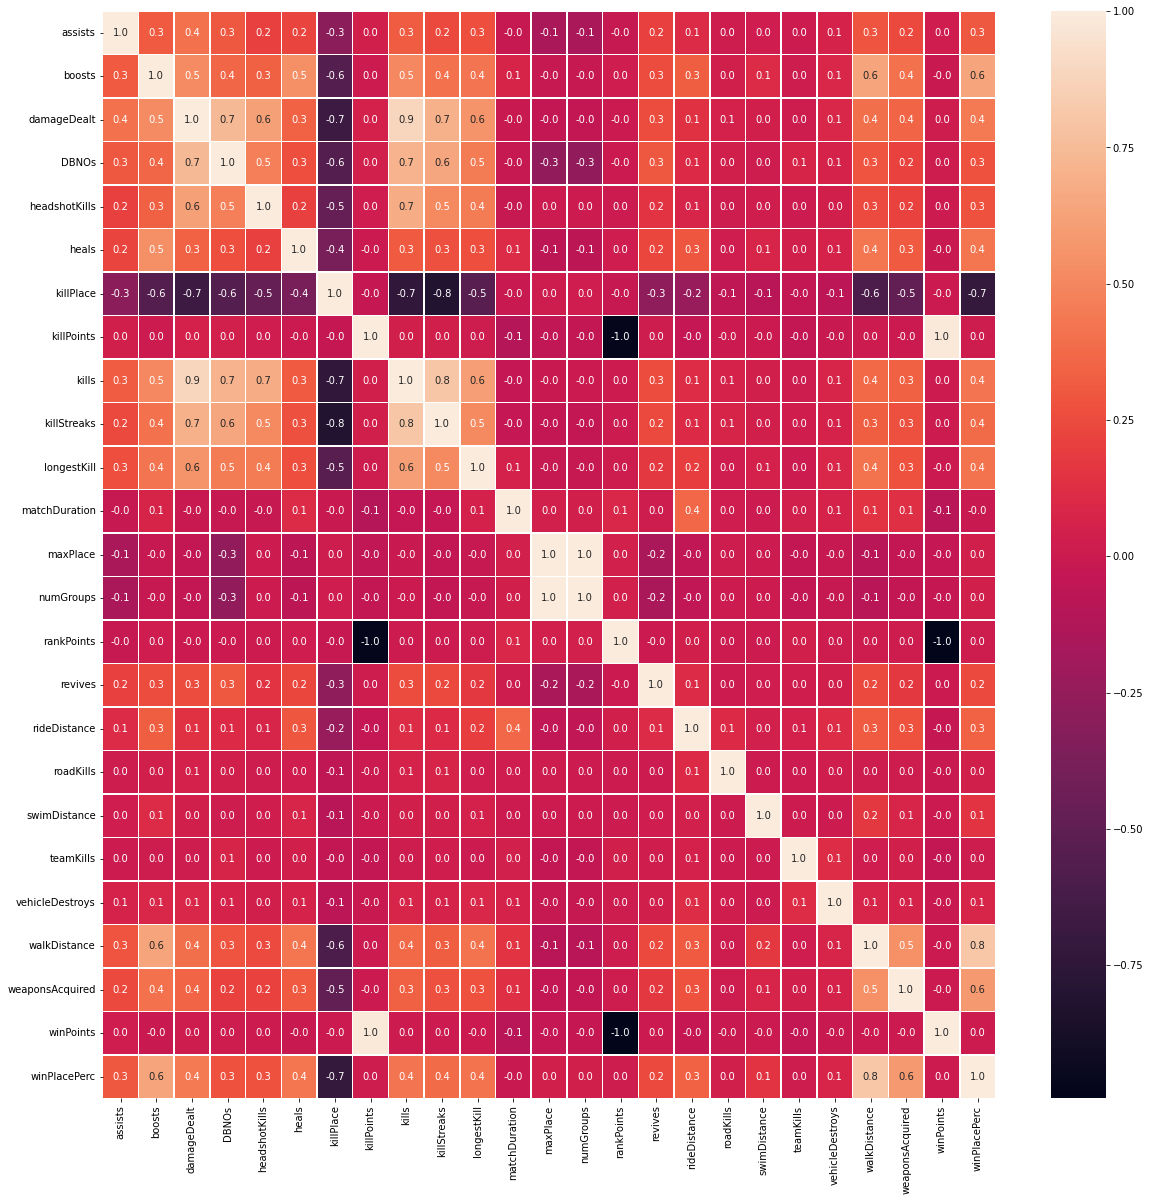

In [19]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)
plt.show()